## Downloading iris dataset

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

--2022-06-20 11:30:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-06-20 11:30:39 (99.6 MB/s) - ‘iris.data’ saved [4551/4551]



## Importing necessary libraries

In [2]:
# libraries required to complete this task
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import itertools
plt.style.use('fivethirtyeight')

In [3]:
colnames = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv('iris.data', names=colnames) # reading the dataset
df.index.names = ['id'] 
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
id,,,,,
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['targets'] = df['Species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2])

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,targets
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


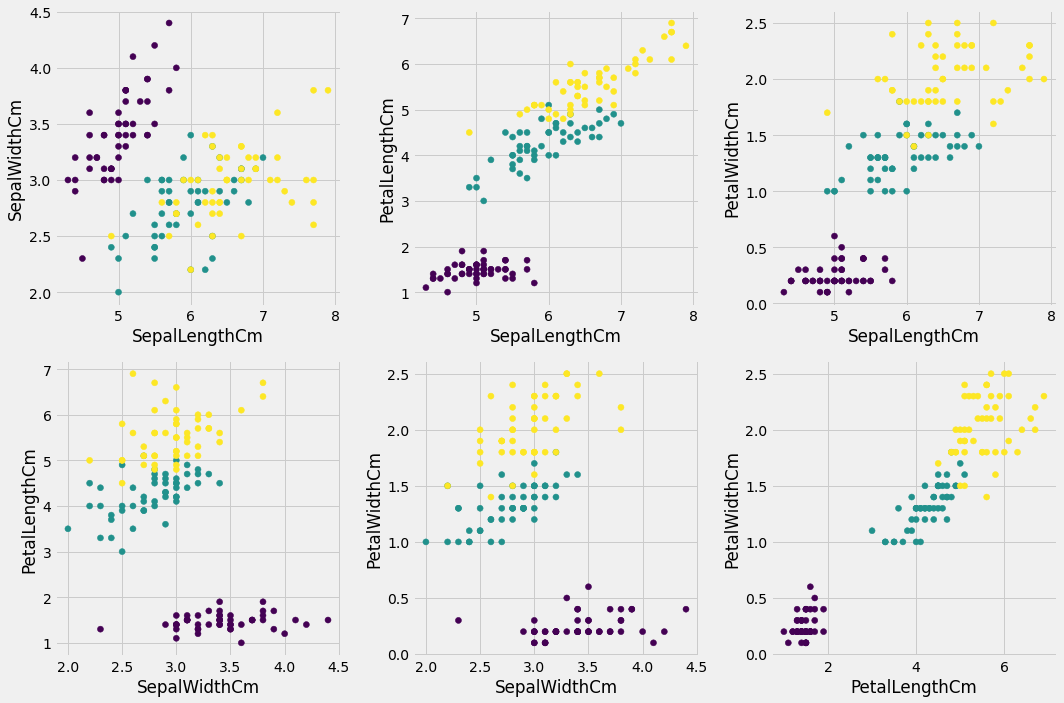

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
variables = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
pos_combs = list(itertools.combinations(variables, 2))
for ax, (v1, v2) in zip(axs.flatten(), pos_combs):
    ax.scatter(df[v1], df[v2], c=df['targets'])
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
plt.tight_layout()

## Optimization to find optimum number of cluster in this dataset

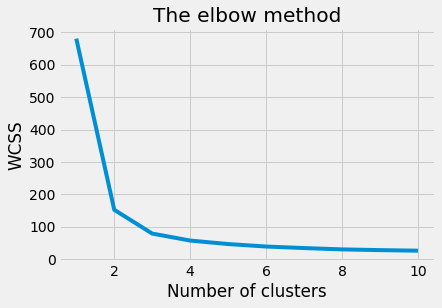

In [7]:
# Finding the optimum number of clusters
x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# plotting the result
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### We can see here why this method is called **Elbow Method**, because curve forms elbow shape and optimum numbers of clusters form where elbow occurs in this case it is **3**

In [8]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

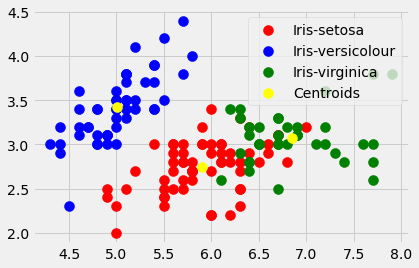

In [9]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()